# Blasius profile

In [2]:
from math import sin, cos, log, ceil, pi, fabs, sqrt
import numpy
import scipy.linalg
from matplotlib import pyplot
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [3]:
def f(u):
    """Returns the right-hand side of the Blasius system of equations.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    f array containing the RHS given u.
    """
    
    f = numpy.array([-0.5*u[0]*u[2],u[0],u[1]])
    
    return f

Now, RK4's method is implemented in a simple function `RK4_step()`:

In [4]:
def RK4_step(u, f, dt):
    """Returns the solution at the next time-step using RK4's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    unp1 : array of float
        approximate solution at the next time step.
    """
    k1=f(u)
    
    utemp=u+0.5*k1*dt
    k2=f(utemp)
    
    utemp=u+0.5*k2*dt
    k3=f(utemp)
    
    utemp=u+k3*dt
    k4=f(utemp)
    
    unp1=u+dt*(k1+2.0*k2+2.0*k3+k4)/6.0
    
    return unp1

In [5]:
def RK4(u, N):
    for n in range(N-1):
        u[n+1] = RK4_step(u[n], f, dx)
    return u[n+1,1]

0.4472017641928687 0.4472017641965067
[ 0.          0.          0.44720176]
999 [  6.49424454e+01   1.00000000e+00   3.78706659e-37]
0.469599997606565 0.469599997610203
[ 0.      0.      0.4696]
999 [  6.50169194e+01   1.00000000e+00   1.13333184e-58]
theta 0.04479784317289729
delta 0.09541222552041524
alpha 1.490887800256816
val12 318.0407517347175
dx 0.0663
val21 0.0013254823995985222
N 1000
maxind 1421 maxlam (1.18639300506e-07+0j)
(1.18639300506e-07+0j) (0.000444718020202+0j) (6.00072537352e-08+0j)
grid number per theta 7.081733031674209


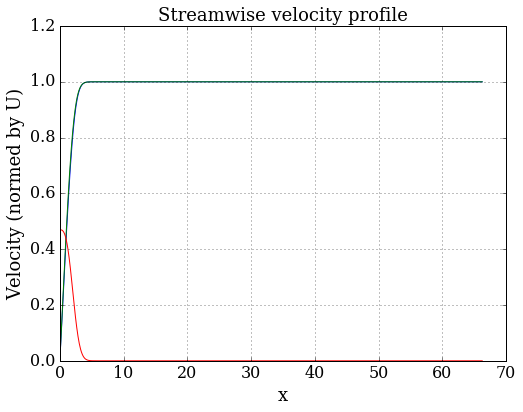

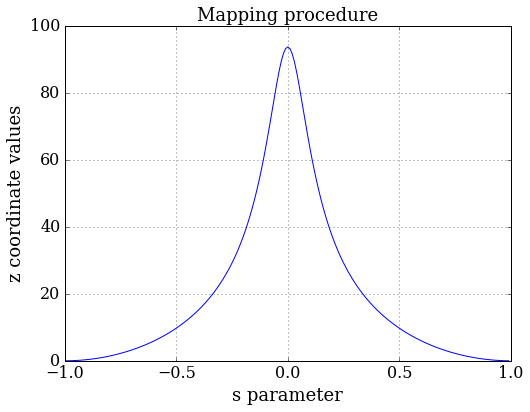

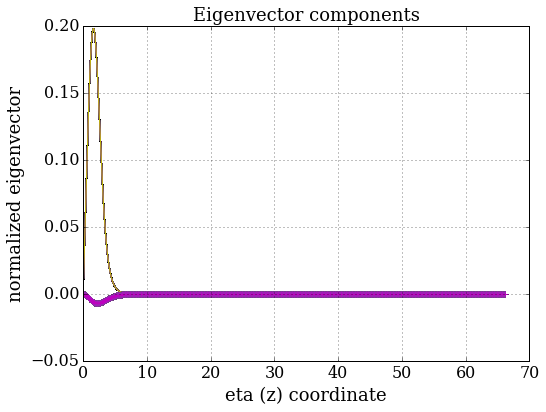

In [82]:
# model parameters (maximal value of the similarity variable, number of the grid points):
etamax=66.3
N=1000

# uniform numerical grid
x=numpy.linspace(0,etamax,N,endpoint=False)
dx=etamax/N

# initializing the array of looking for function (firts two are well defined but third one is appoximative)
g = numpy.zeros((N,3))

# initial supposing for a second derivative at edge and an interval for iterations

lowlim  = 0
highlim = 1

# the cycle to approach a supposing initial condition for second derivative to a reality

while((highlim-lowlim)>1E-12):

    f2b = (lowlim+highlim)/2

# initial conditions
    g[0] = numpy.array([0,0,f2b])

# a cycle to calculate an equation solution from boundary to faraway (one of the boundary conditions is lost)

    for n in range(N-1):
        g[n+1] = (g[n][1]*dx+g[n][0],g[n][2]*dx+g[n][1],-g[n][0]*g[n][2]*dx+g[n][2])  
    
# control of boundary condition at far away to break the calculations
    
    if(fabs(g[n+1][1]-1)<1E-12):
        break
        
# cheking to choose better initial condition
        
    if(g[n+1][1]>1): 
        highlim=f2b
    else:
        lowlim=f2b
        
print(lowlim,highlim)
print(g[0])
print(n+1,g[n+1])

# the same as above but for the Runge- Kutta method

# initializing the array of looking for function (firts two are well defined but third one is appoximative)
h = numpy.zeros((N,3))
k = numpy.zeros((4,3))

# initial supposing for a second derivative at edge and an interval for iterations

lowlim  = 0
highlim = 1.0

while((highlim-lowlim)>1E-12):

    f2b = (lowlim+highlim)/2

# initial (boundary) conditions
    h[0] = numpy.array([0,0,f2b])

# a cycle to calculate an equation solution from boundary to faraway (one of the boundary conditions is lost)

    for n in range(N-1):
        k[0] = (h[n][1],h[n][2],-h[n][0]*h[n][2])
        k[1] = (h[n][1]+0.5*dx*k[0][1],h[n][2]+0.5*dx*k[0][2],-(h[n][0]+0.5*dx*k[0][0])*(h[n][2]+0.5*dx*k[0][2]))
        k[2] = (h[n][1]+0.5*dx*k[1][1],h[n][2]+0.5*dx*k[1][2],-(h[n][0]+0.5*dx*k[1][0])*(h[n][2]+0.5*dx*k[1][2]))
        k[3] = (h[n][1]+dx*k[2][1],h[n][2]+dx*k[2][2],-(h[n][0]+dx*k[2][0])*(h[n][2]+dx*k[2][2]))

        h[n+1] = h[n]+dx*(k[0]+2.0*k[1]+2.0*k[2]+k[3])/6.0  
#        print('***',n+1,h[n+1][0],h[n+1][1],h[n+1][2])
# control of boundary condition at far away
    
    if(fabs(h[n+1][1]-1)<1E-12):
        break
        
# cheking to choose better initial condition
    
    if(h[n+1][1]>1): 
        highlim=f2b
    else:
        lowlim=f2b
        
print(lowlim,highlim)
print(h[0])
print(n+1,h[n+1])

# the eigenvalue problem

# defenition of the mean field velocity, the kinematic viscosity, the radius of curvature, Goertler number

v0 = 500.0 # in cm/sec
nu = 0.15  # in cm*2/sec
R  = 320.0 # in cm
G  = 1.7668
alph = 0.7 # normalized wavenumber as in Liu`s paper

theta = (G*G*nu*nu*R/v0/v0)**0.333333 # the momentum thickness
delta = theta/0.4695189          # boundary layer thickness
alpha = alph/theta*delta               # normalized wavenumber
val12 = v0*delta/nu              # coefficient of matrix 12

print('theta',theta)
print('delta',delta)
print('alpha',alpha)
print('val12',val12)
print('dx',dx)
print('val21',2.0*alpha*alpha/R*delta)
print('N',N)

cmat = numpy.zeros((N-2,N-2))    # discretized matrix of the differential operator for u

cmat[0][0] = -2.0-alpha*alpha*dx*dx   # first row definition
cmat[0][1] = 1.0

for n in range(1,N-3):           # middle row definition
    cmat[n][n-1] = 1.0
    cmat[n][n]   = -2.0-alpha*alpha*dx*dx
    cmat[n][n+1] = 1.0

cmat[N-3][N-4] = 1.0       # last row definition
cmat[N-3][N-3] = -2.0-alpha*alpha*dx*dx

amat = numpy.zeros((N-2,N-2))    # discretized matrix of the differential operator for w

#amat[0][0] = -alpha*alpha*dx*dx   # first row definition
#amat[0][1] = 1.0

amat[0][0] = -2.0-alpha*alpha*dx*dx   # first row definition
amat[0][1] = 1.0

for n in range(1,N-3):           # middle row definition
    amat[n][n-1] = 1.0
    amat[n][n]   = -2.0-alpha*alpha*dx*dx
    amat[n][n+1] = 1.0

amat[N-3][N-4] = 1.0       # last row definition
amat[N-3][N-3] = -2.0-alpha*alpha*dx*dx

#amat[N-3][N-4] = 1.0       # last row definition
#amat[N-3][N-3] = -alpha*alpha*dx*dx

bmat = numpy.zeros((N-2,N-2))    # square of defined above matrix

bmat = numpy.dot(amat,amat)

aaa = scipy.linalg.det(amat)
bbb = scipy.linalg.det(bmat)
ccc = scipy.linalg.det(cmat)

#print('first',1.0,'second',alpha*alpha*dx*dx)
#print('cmat[0][0]',cmat[0][0],'cmat[N-3][N-3]',cmat[N-3][N-3])
#print('bmat[0][0]',bmat[0][0],'bmat[N-3][N-3]',bmat[N-3][N-3])
#print('deta',aaa,'detb',bbb,'detc',ccc)

lefmat = numpy.zeros((2*N-6,2*N-6))   # two matrices of the generelized problem
rigmat = numpy.zeros((2*N-6,2*N-6))

for n in range(0,N-2):
    for m in range(0,N-2):
        lefmat[n][m] = cmat[n][m]
        
lefmat[0][N-2] = -0.25*val12*h[1][2]*dx*dx
        
for n in range(1,N-3):
    lefmat[n][n+N-3] = -val12*h[n+1][2]*dx*dx
    
lefmat[N-3][2*N-7] = -0.25*val12*h[N-2][2]*dx*dx
    
for n in range(N-2,2*N-6):
    lefmat[n][n-N+3] = 0.5*val12*2.0*alpha*alpha*dx*dx*dx*dx*h[n-N+4][1]/(R/delta-x[n-N+4])
    
for n in range(N-2,2*N-6):
    for m in range(N-2,2*N-6):
        lefmat[n][m] = 0.5*bmat[n-N+3][m-N+3]
        
lefmat[N-2][N-2] = lefmat[N-2][N-2] + 0.25*0.5*bmat[1][0]        # matrix correction by the boundary condition w1=0.25w2
lefmat[N-1][N-2] = lefmat[N-1][N-2] + 0.25*0.5*bmat[2][0]
lefmat[2*N-8][2*N-7] = lefmat[2*N-8][2*N-7] + 0.25*0.5*bmat[N-5][N-3]
lefmat[2*N-7][2*N-7] = lefmat[2*N-7][2*N-7] + 0.25*0.5*bmat[N-4][N-3]

for n in range(0,N-2):
    rigmat[n][n] = 1.0
    
for n in range(N-2,2*N-6):
    for m in range(N-2,2*N-6):
        rigmat[n][m] = 0.5*amat[n-N+3][m-N+3]

rigmat[N-2][N-2] = rigmat[N-2][N-2] + 0.25*0.5*amat[1][0]        # matrix correction by the boundary condition w1=0.25w2
rigmat[2*N-7][2*N-7] = rigmat[2*N-7][2*N-7] + 0.25*0.5*amat[N-4][N-3]

#for n in range(0,N-2):
#    print(n,bmat[n][n])

aaa = scipy.linalg.det(lefmat)
bbb = scipy.linalg.det(rigmat)

#print('det1',aaa,'det2',bbb)

w,v = scipy.linalg.eig(lefmat,rigmat)
vv  = numpy.real(v)

maxlam = numpy.max(w)
maxind = numpy.argmax(w)

u1 = numpy.zeros((N,N))
w1 = numpy.zeros((N,N))

u1[0] = 0.0
w1[0] = 0.0
for n in range(1,N-1):
    u1[n] = vv[n-1][maxind]
for n in range(2,N-2):
    w1[n] = vv[n+N-4][maxind]
w1[1] = 0.25*w1[2]
w1[N-2] = 0.25*w1[N-3]
u1[N-1] = 0.0
w1[N-1] = 0.0

print('maxind',maxind,'maxlam',maxlam)

#for n in range(0,N-2):
#    print(w)

print(maxlam,maxlam*nu/delta/delta/dx/dx,maxlam*nu/delta/dx/dx/numpy.sqrt(2)/v0)

pyplot.figure(figsize=(8,6))        # plot of the Blasius profile
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'Velocity (normed by U)', fontsize=18)
pyplot.title('Streamwise velocity profile', fontsize=18)

pyplot.plot(x,g[:,1],'-',x,h[:,1],'-',x,h[:,2],'-')

s = numpy.arange(-1.0,1.0,0.01)
    
pyplot.figure(figsize=(8,6))         # plot of the mapping procedure from the paper
pyplot.grid(True)
pyplot.xlabel(r's parameter', fontsize=18)
pyplot.ylabel(r'z coordinate values', fontsize=18)
pyplot.title('Mapping procedure', fontsize=18)

pyplot.plot(s,0.5*14.0625*(1.0+numpy.cos(pi*s))/numpy.sqrt(1.0225-0.5*(1.0+numpy.cos(pi*s))))


pyplot.figure(figsize=(8,6))          # plot of the velocities from the eigenvector
pyplot.grid(True)
pyplot.xlabel(r'eta (z) coordinate', fontsize=18)
pyplot.ylabel(r'normalized eigenvector', fontsize=18)
pyplot.title('Eigenvector components', fontsize=18)

pyplot.plot(x,u1[:],'-',x,w1[:],'+')


print('grid number per theta',theta/dx/delta)

# initialize the array containing the solution for each time-step
u = numpy.empty((N, 3))
u[0] = numpy.array([0.332057337205, 0, 0])# fill 1st element with initial values

u_out=RK4(u,N)

## Plot the profile and get solution from BL equations

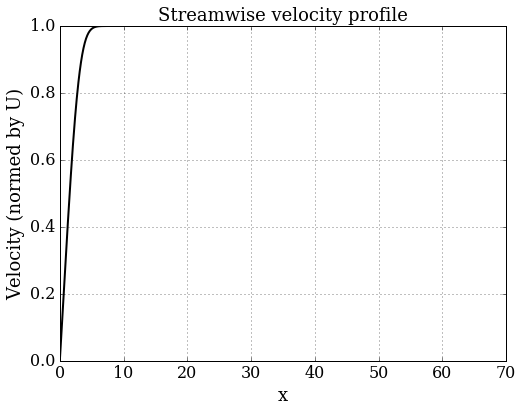

In [7]:
# visualization of the path
pyplot.figure(figsize=(8,6))
pyplot.grid(True)
pyplot.xlabel(r'x', fontsize=18)
pyplot.ylabel(r'Velocity (normed by U)', fontsize=18)
pyplot.title('Streamwise velocity profile', fontsize=18)
pyplot.plot(x,u[:,1], 'k-', lw=2);


In [8]:
#test